In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [33]:
df_train = pd.read_csv('train_mod.csv')
df_test = pd.read_csv('test.csv')

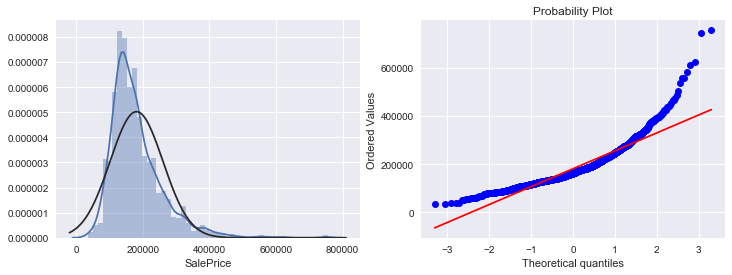

In [19]:
# SalePrice
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=norm)
plt.subplot(1,2,2)
_= stats.probplot(df_train.SalePrice, plot=plt)

In [20]:
df_train.SalePrice = np.log1p(df_train.SalePrice)

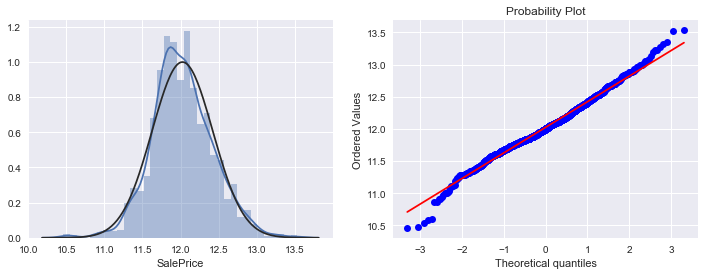

In [21]:
# SalePrice
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=norm)
plt.subplot(1,2,2)
_= stats.probplot(df_train.SalePrice, plot=plt)

In [34]:
num_cols = df_train.dtypes[df_train.dtypes != "object"].index
skewed_cols = df_train[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [40]:
# Scale numeric columns
scaler = StandardScaler()
#scaler = preprocessing.RobustScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [35]:
skewed_cols

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
Unnamed: 0        0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
Y

In [ ]:
plt.scatter(df_train.MiscVal, df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.axis(ymin=0, ymax=800000)

(-775.0086245519715, 16275.008624551974, 0, 800000)

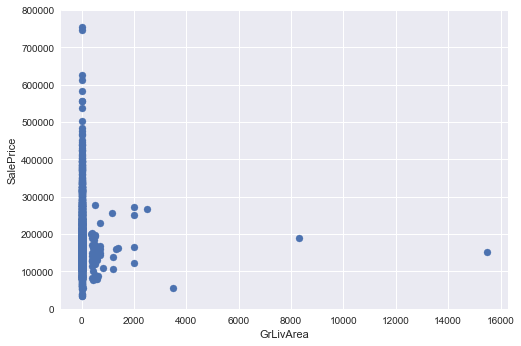

In [29]:
plt.scatter(df_train.MiscVal, df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.axis(ymin=0, ymax=800000)

In [36]:
skewed_cols = skewed_cols[abs(skewed_cols) > 0.75]
skewed_features = skewed_cols.index
lam = 0.15
for feat in skewed_features:
    df_train[feat] = boxcox1p(df_train[feat], boxcox_normmax(df_train[feat]+1))
#    df_train[feat] = boxcox1p(df_train[feat], lam)
    
df_train[skewed_features] = np.log1p(df_train[skewed_features])

#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
#    #all_data[feat] += 1
#    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [37]:
skewed_cols = df_train[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [38]:
skewed_cols # Kaggle

PoolArea         14.341373
3SsnPorch         7.654811
LowQualFinSF      7.353266
MiscVal           5.059352
BsmtHalfBath      3.893499
KitchenAbvGr      3.162362
ScreenPorch       3.123352
BsmtFinSF2        2.459910
EnclosedPorch     2.070895
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
MasVnrArea        0.435095
2ndFlrSF          0.279178
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
MSSubClass        0.141562
WoodDeckSF        0.110781
YrSold            0.096170
SalePrice         0.079874
FullBath          0.036524
1stFlrSF          0.015502
Id                0.000000
Unnamed: 0        0.000000
GrLivArea        -0.074888
OpenPorchSF      -0.135175
LotArea          -0.338937
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
BsmtFinSF1       -0.703620
BsmtUnfSF        -2.692327
T

In [26]:
skewed_cols #Korean

PoolArea         14.345654
3SsnPorch         7.642080
LowQualFinSF      7.319131
MiscVal           5.040006
BsmtHalfBath      3.887518
ScreenPorch       3.133510
KitchenAbvGr      3.094930
BsmtFinSF2        2.462835
EnclosedPorch     2.084299
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
MasVnrArea        0.463879
2ndFlrSF          0.289634
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
MSSubClass        0.154485
WoodDeckSF        0.141535
SalePrice         0.121222
YrSold            0.096170
FullBath          0.036524
Id                0.000000
Unnamed: 0        0.000000
OpenPorchSF      -0.086470
1stFlrSF         -0.096173
GrLivArea        -0.138672
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotArea          -0.628465
BsmtFinSF1       -0.637151
BsmtUnfSF        -2.334942
T

(-0.1675679216764213, 3.288938302636149, 0, 13.705890566164937)

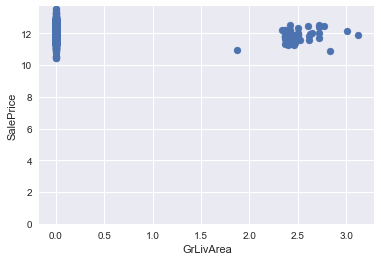

In [11]:
plt.scatter(df_train.MiscVal, df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.axis(ymin=0)